In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
# 説明変数
X = iris.data

In [5]:
# 目的変数
Y = iris.target

In [6]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris_data = DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [11]:
iris_target = DataFrame(Y, columns=['Species'])

In [12]:
# targetの0,1,2をそれぞれの名前にする
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [14]:
iris_target.sample(10)

,Species
45,0
24,0
139,2
43,0
54,1
114,2
110,2
80,1
65,1
122,2


In [17]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [18]:
iris_target.sample(10)

,Species
79,Veriscolour
113,Virginica
115,Virginica
50,Veriscolour
61,Veriscolour
119,Virginica
4,Setosa
118,Virginica
29,Setosa
64,Veriscolour


In [19]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [20]:
iris.sample(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
118,7.7,2.6,6.9,2.3,Virginica
123,6.3,2.7,4.9,1.8,Virginica
102,7.1,3.0,5.9,2.1,Virginica
25,5.0,3.0,1.6,0.2,Setosa
127,6.1,3.0,4.9,1.8,Virginica
24,4.8,3.4,1.9,0.2,Setosa
125,7.2,3.2,6.0,1.8,Virginica
78,6.0,2.9,4.5,1.5,Veriscolour
39,5.1,3.4,1.5,0.2,Setosa
99,5.7,2.8,4.1,1.3,Veriscolour


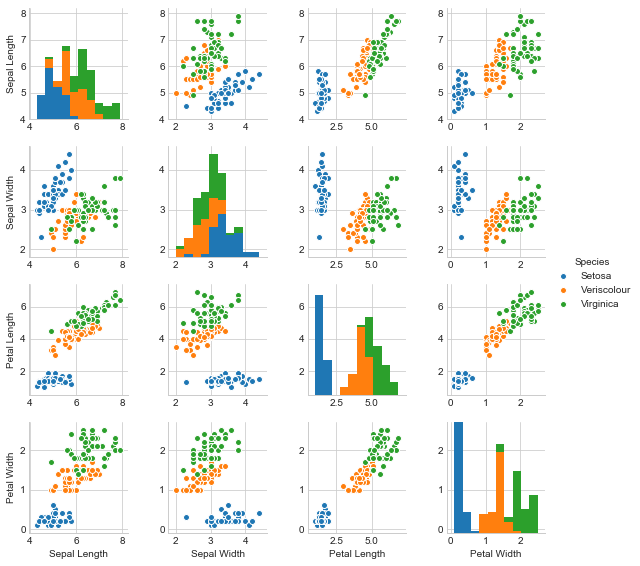

In [22]:
sns.pairplot(iris, hue='Species', size=2)

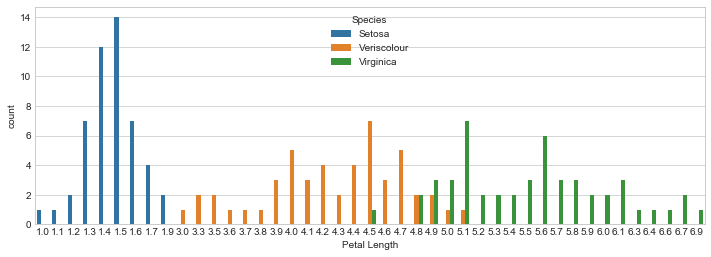

In [23]:
plt.figure(figsize=(12, 4))
sns.countplot('Petal Length', data=iris, hue='Species')

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [25]:
logreg = LogisticRegression()

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=3)

In [27]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
from sklearn import metrics

In [29]:
Y_pred = logreg.predict(X_test)

In [30]:
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [31]:
metrics.accuracy_score(Y_test, Y_pred)

0.93333333333333335

### K近傍法

In [32]:
from IPython.display import Image

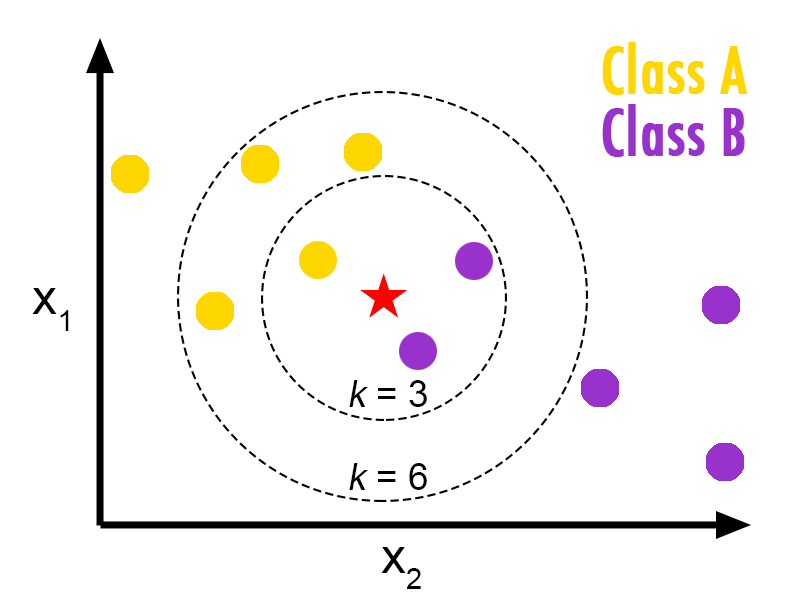

In [33]:
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

- k = 3の場合、自分と近い3つのデータはClassBが2つ、ClassAは1つ。よってサンプルはClassBに分類される。
- k = 6の場合、自分と近い6つのデータはClassBが2つ、ClassAは4つ。よってサンプルはClassAに分類される。

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [37]:
Y_pred = knn.predict(X_test)

In [38]:
metrics.accuracy_score(Y_test, Y_pred)

0.94999999999999996

In [41]:
# n_neighbors=1の場合
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [42]:
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.96666666666666667

In [43]:
k_range = range(1, 90)

In [44]:
accuracy = []

In [45]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    metrics.accuracy_score(Y_test, Y_pred)

ValueError: x and y must have same first dimension, but have shapes (89,) and (0,)

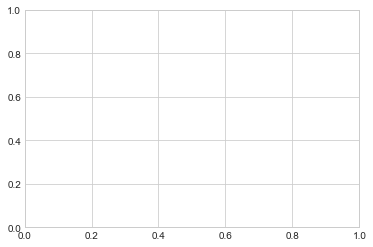

In [46]:
plt.plot(k_range, accuracy)